# Embedding

## Why Embedding?
As we know, machines can't handle text, it can only handle numbers. But how to convert a word to numbers?

The most naive approach would be to take a list of all the words in your text and attribute a number to all of them. It will work but you can imagine that some problems will appear:
* How do you handle unknown words? 
* If your text contains `doctor`, `nurse`, and `candy`. `doctor` and `nurse` have a strong similarity but `candy` doesn't. How can we make the machine understand that? With our naive technique, `doctor` could have the number `5` associated to it and nurse the number `98767`.

Of course, a lot of people already spent some time with those problems. the solution that came out of it is "Embedding". 

## What is embeddings?

An embedding is a **VECTOR** which represents a word or a document.

A vector will be attributed to each token. Each vector will contain multiple dimensions (usually tens or hundreds of dimensions).

```
[...] associate with each word in the vocabulary a distributed word feature vector [...] The feature vector represents different aspects of the word: each word is associated with a point in a vector space. The number of features [...] is much smaller than the size of the vocabulary.
```
- [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf), 2003.

Long story short, embeddings convert words into vectors in a way that allows the machine to understand the similarity betweens them.

Each embedding library has it's own way of classifying words, it will regroup words into big categories. Each word will get a score for each category.

To take a simple example the word `mother` could be classified like that:

|        | female | family | human | animal|
|--------|--------|---------|-------|-------|
| mother | 0.9    | 0.9.    | 0.7   | 0.1   |

**Explanations:** Mother has a strong similarity with female, family and human but it has a low similarity with animal.

**Disclaimer:** Those numbers and categories are totally arbitrary and are only here to show an example.

Here is another example with more complete datas:

![embedding](https://miro.medium.com/max/2598/1*sAJdxEsDjsPMioHyzlN3_A.png)

## Should I do it by hand?

You could, but if some people already did the job for you and spent a lot of time to optimize it, why not use it?

## What to use?

There are a lot of libraries out there for embeddings. Which one is the best? Once again, *it depends*. The results will change depending on the text you are using, the information you want to extract, the model you use,...

Choosing the "best" embedding model will be part of the hyper-optimization that you can do at the end of a project.

If you want understand embeddings more in depth, [follow this link](http://jalammar.github.io/illustrated-word2vec/) or watch this [video](https://www.youtube.com/watch?v=gQddtTdmG_8).

Here are some of the best libraries:

* [Gensim](https://pypi.org/project/gensim/)
* [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec)

This next bit of code loads a model for practice

In [2]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 7.0 MB/s eta 0:00:0000:0100:01
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import gensim.downloader as api
from gensim.models import KeyedVectors
import math
import numpy as np

# Path where you want to store/load the model
model_path = "models/glove-wiki-gigaword-300.kv"

# Load model from disk if exists, else download and save it
if os.path.exists(model_path):
    print("Loading model from local file...")
    model = KeyedVectors.load(model_path)
else:
    print("Downloading model...")
    model = api.load("glove-wiki-gigaword-300")
    model.save(model_path)
    print("Model downloaded and saved.")


[==================================================] 100.0% 376.1/376.1MB downloaded
Model downloaded and saved.


## Practice time!

Enough reading, let's practice a bit. On this sentence:

In [4]:
sentence = "I love learning"

What do the word vectors look like? What is their size? What is their [magnitude](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html)?

In [5]:
words = sentence.lower().split()

for word in words:
    vector = model[word]
    print (f"Word: {word}")
    print (f"Vector: {vector[:10]}...")
    print (f"Size: {len(vector)}")
    print (f"Magnitude: {np.linalg.norm(vector)}")


Word: i
Vector: [-0.13292   0.16985  -0.1436   -0.088722  0.07951  -0.14212  -0.024209
 -0.26291  -0.074814 -2.36    ]...
Size: 300
Magnitude: 6.9177021980285645
Word: love
Vector: [-0.45205  -0.33122  -0.063607  0.028325 -0.21372   0.16839  -0.017186
  0.047309 -0.052355 -0.98706 ]...
Size: 300
Magnitude: 6.136056423187256
Word: learning
Vector: [-0.38732   -0.32467    0.22053   -0.12059   -0.14239    0.0017644
  0.047267  -0.10137    0.01616   -1.4371   ]...
Size: 300
Magnitude: 5.955530643463135


## Maths on text

Since the words are embedded into vectors we can now apply mathematical methods on them.

### Average vector

For example we could build the average vector for a text by using NumPy! This is a straightforward way to build one single representation for a text.

- Apply a gensim model on the text
- Get all word vectors into a list
- Compute and display the average vector of the list
- Get it's representation using the gensim most_similar method

In [11]:
text = "I want to be a famous data scientist"

text_words = text.lower().split()
text_vectors_list = []

for text_word in text_words:
    text_word_vector = model[text_word]
    text_vectors_list.append(text_word_vector)

text_average_vector = sum(text_vectors_list)/len(text_vectors_list) 
print (f"The average vector of the list is {text_average_vector}")

similar_words = model.most_similar(positive=[text_average_vector], topn=5)

print("Similar words of the average vector:")
for similar_word, score in similar_words:
    print (f"{similar_word} (score : {score:.3f})")




The average vector of the list is [-6.72467574e-02  1.12447746e-01 -7.71599859e-02 -1.69428512e-01
 -5.58186248e-02 -9.41490084e-02 -5.27175106e-02 -1.63590372e-01
  1.71046898e-01 -1.79302382e+00  1.76756769e-01 -2.72012115e-01
  1.42969117e-01  7.32323825e-02  4.17656302e-02  1.89646140e-01
 -8.18032548e-02 -2.79211383e-02  7.30096251e-02 -3.21437493e-02
 -6.62687570e-02  1.78439721e-01  2.54457235e-01  2.77096242e-01
 -2.80990869e-01 -8.41237605e-03  6.61918521e-02 -1.09376237e-01
  4.87642437e-02  3.15013751e-02 -2.06287671e-03  2.67908037e-01
 -3.09515625e-01 -9.38455015e-02 -8.12166214e-01  1.82940513e-01
 -5.60493767e-02  1.22733869e-01 -3.00024766e-02  1.23137251e-01
 -2.47410014e-02 -1.69102743e-01  3.15025002e-02  1.52458251e-01
 -1.54302120e-01  8.37732479e-02  1.22663744e-01  9.39768776e-02
 -1.77266628e-01 -6.49045482e-02  1.00111119e-01 -2.05699265e-01
  2.79726274e-02  3.56931277e-02 -1.47227630e-01  1.55752242e-01
  3.81776243e-02  1.37220010e-01  5.79744950e-02  5.5283

### Word similarity

We can also compute the similarity between two words by using distance measures (e.g. [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html), [euclidean distance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html)...). These measures will calculate the distance between word embeddings in the vector space.

Identify what fundamental difference there is between these two metrics when it comes to assessissing similarity between vectors.

#### Let's practice!

- Compute the cosine and the euclidean distance between those 4 words in a similarity table visualizing it with matplotlib and/or seaborn
- Assess which words are the most similar and the most dissimilar

In [13]:
%pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 8.2 MB/s eta 0:00:00:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 9.0 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 19.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 15.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 7.2

<function matplotlib.pyplot.show(close=None, block=None)>

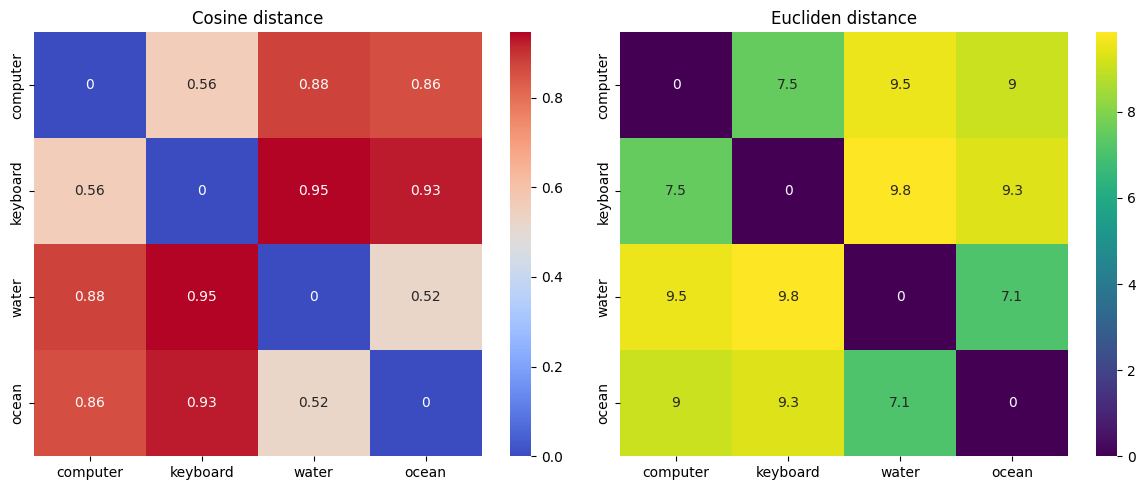

In [18]:
words = ["computer","keyboard","water","ocean"]

from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# avoid error 
missing = [word for word in words if word not in model]
if missing:
    raise ValueError (f"{missing} not in the model vocabulary")

# (other way to create a list and append directly the vectors in it)
vectors = [model[word] for word in words]

#calculate distances
cosine_matrix = cosine_distances (vectors)
euclidean_matrix = euclidean_distances (vectors)

# convert to a df for visualisation 
cosine_df = pd.DataFrame(cosine_matrix, index=words, columns=words)
euclidean_df = pd.DataFrame(euclidean_matrix, index=words, columns=words)

# visualisation (axs = liste de deux axes)
fig, axs = plt.subplots(1,2, figsize=(12,5))

# Heatmaps with Seaborn (annot=True display numerical values in the cases, coolwarm/viridis = different colors)
sns.heatmap(cosine_df, annot=True, cmap="coolwarm", ax=axs[0])
axs[0].set_title("Cosine distance")
sns.heatmap(euclidean_df, annot=True, cmap="viridis", ax=axs[1])
axs[1].set_title("Euclidean distance")

# Layout automatic adjustement 
plt.tight_layout() # avoid overlapping axes
plt.show # displays graphics on the screen 



## Combining things together

This next bit of code uses the gensim library to allow you to perform arithmetic operations on vectors. Things you may want to try:

Silly additions:
 - man + hair

Checking for some more abstractions:
 - hair - woman + man
 - mice - home + city
 - children - child + goose
 - paris - france + belgium

Bonus points if you can make a function which takes any form of addition and substraction calculations on word vectors.

In [21]:
equals=model.most_similar(positive=['king', 'woman'], negative=['man'])[0][0]
print(f"'king' - 'man' + 'woman' = {equals}'")

'king' - 'man' + 'woman' = queen'


In [25]:
def vector_arithmetic(positives=[], negatives=[]):
    result = model.most_similar(positive=positives, negative=negatives, topn=1)
    
    positives_text = ' + '.join(positives)
    negatives_text = ' - '.join(negatives)
    result_word = result [0][0] #take the first element from the first tuple in the list (as result is a list of tuple containing the word and the vector)
    result_score = result [0][1] #take the second element from the first tuple in the list

    print(f"{positives_text} - {negatives_text} = {result_word} (score : {result_score:.2f})")
    return result_word

In [26]:
vector_arithmetic(positives=["hair","man"], negatives=["woman"])

hair + man - woman = beard (score : 0.57)


'beard'

In [ ]:
vector_arithmetic(positives=["children","goose"], negatives=["child"])

children + goose - child = geese (score : 0.49)


'geese'

In [30]:
vector_arithmetic(positives=["mice","city"], negatives=["home"])

mice + city - home = rats (score : 0.54)


'rats'

In [32]:
vector_arithmetic(positives=["paris","belgium"], negatives=["france"])

paris + belgium - france = brussels (score : 0.70)


'brussels'

When you play with these examples (or others). You quickly notice both the powerful levels of abstraction and the gaping limitations.

## More resources
* [Why do we use word embeddings in NLP?](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2)
* [More details on what word embeddings are exactly?](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)